 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Survival-on-the-Titanic" data-toc-modified-id="Survival-on-the-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Survival on the Titanic</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Executive-Summary" data-toc-modified-id="Executive-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Data-Acquistion-and-Interpretation" data-toc-modified-id="Data-Acquistion-and-Interpretation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Acquistion and Interpretation</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Preliminary-Analysis-and-Dataset-Characterization" data-toc-modified-id="Preliminary-Analysis-and-Dataset-Characterization-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Preliminary Analysis and Dataset Characterization</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Dataset-Int/Float-Distribution" data-toc-modified-id="Dataset-Int/Float-Distribution-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Dataset Int/Float Distribution</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Sex" data-toc-modified-id="Sex-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Embarked" data-toc-modified-id="Embarked-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Embarked</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Passenger-Class" data-toc-modified-id="Passenger-Class-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Passenger Class</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Age" data-toc-modified-id="Age-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Family" data-toc-modified-id="Family-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Family</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Name" data-toc-modified-id="Name-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Name</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Fare" data-toc-modified-id="Fare-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Fare</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Dropping-Elements" data-toc-modified-id="Dropping-Elements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dropping Elements</a></span><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Dataset-Object-Distribution" data-toc-modified-id="Dataset-Object-Distribution-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Dataset Object Distribution</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Analysis:-Quick-Correlations" data-toc-modified-id="Analysis:-Quick-Correlations-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Analysis: Quick Correlations</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.0.2.1"><span class="toc-item-num">2.0.2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Random-Forest" data-toc-modified-id="Random-Forest-2.0.2.2"><span class="toc-item-num">2.0.2.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-2.0.2.3"><span class="toc-item-num">2.0.2.3&nbsp;&nbsp;</span>Support Vector Machines</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-2.0.2.4"><span class="toc-item-num">2.0.2.4&nbsp;&nbsp;</span>Gradient Boosting Classifier</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#K-nearest-Neighbors" data-toc-modified-id="K-nearest-Neighbors-2.0.2.5"><span class="toc-item-num">2.0.2.5&nbsp;&nbsp;</span>K-nearest Neighbors</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Gaussian-Naive-Bayes" data-toc-modified-id="Gaussian-Naive-Bayes-2.0.2.6"><span class="toc-item-num">2.0.2.6&nbsp;&nbsp;</span>Gaussian Naive Bayes</a></span></li></ul></li></ul><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Complete-the-Dataset" data-toc-modified-id="Complete-the-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Complete the Dataset</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#OLD" data-toc-modified-id="OLD-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>OLD</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Dropping-data" data-toc-modified-id="Dropping-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Dropping data</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Types-of-Variables" data-toc-modified-id="Types-of-Variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Types of Variables</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Categorical-Variables" data-toc-modified-id="Categorical-Variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Numerical-Variables" data-toc-modified-id="Numerical-Variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Numerical Variables</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Survival.ipynb#Resources" data-toc-modified-id="Resources-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Resources</a></span></li></ul></li></ul></div>

# Survival on the Titanic

This is a notebook to analyze and predict survival rates for passengers on board the Titanic. As stated on [kaggle.com](https://www.kaggle.com/c/titanic):

>On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502** out of **2224** (**$\sim$ 68%**) passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each `PassengerId` in the test set, you must predict a **0** or **1** value for the `Survived` variable.

>Your score is the percentage of passengers you correctly predict.

Both a training dataset (used to train the machine learning algorithim) and a test dataset (used to test the algorithm) have been [provided](https://www.kaggle.com/c/titanic/data). This notebook has borrowed heavily in content and analysis from the following resources:

* [Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Omar El Gabry](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)
* [Arthur Tok](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

**Last edited**: 2017-09-29 17:56:57 

## Executive Summary

Stuff goes here once I'm finished.

## Data Acquistion and Interpretation

In [1]:
# first import relevant libraries

# data management and mathematical functions
import pandas as pd
import numpy as np
import random as rnd

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.cross_validation import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# function to plot a near continuous variable in our dataset against another variable
def plot_distribution( df , var , target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid( df , hue=target , aspect=4, row = row, col = col)
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ))
    facet.add_legend()

# function to plot a variable in our dataset against another variable
def plot_categories( df , cat , target, **kwargs ):
    order = kwargs.get('order', None)
    facet = sns.FacetGrid( df )
    facet.map( sns.barplot , cat , target, order = order )

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now import the data for our problem and look at the first few entries for the training data. The training data is used to train our model which is then applied to the test data (and whereby success is gauged).

In [2]:
# read in training and testing data
train_df = pd.read_csv("./data/train.csv")
test_df  = pd.read_csv("./data/test.csv")

# combine train/test into a new dataframe
full_df = train_df.append (test_df, ignore_index=True)

### Preliminary Analysis and Dataset Characterization
<a id="Intro"></a>

Now let's take a quick detour and explore different ways to get information from our dataset. This section can be collapsed or [skipped](#analysis_qc) for more knowledgeable readers.

The first thing we need to do is analyze this dataset and see what it contains. To see the columns in our dataframe, we use the `columns.values` command:

In [3]:
print (train_df.shape)

print (train_df.columns.values)

train_df.head(4)

(891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


or print out the last three entries with `.tail()`. Note that both of these commands defaults to 5 with no numerical entry.

In [4]:
train_df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


To get the actual structure, we use the `.info()` command:

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So we see that our training set has **891** different entires equivalent to **$\sim$40%** of all passengers on board.
Each entry has **12** different variables: 

* 2 float types
* 5 int types
* 5 string types (objects)

Note also that we have some missing data for the `Age`, `Cabin`, and `Embarked` variables. What do these different variables mean? Let's break it down:

Variable Name  | Meaning
:-------------- | :-------------
PassengerId    | unique numeric identifier
Survived       | whether the passenger survived or not
Pclass         | ticket class
Name           | passenger name
Sex            | passenger sex
Age            | passenger age
SibSp          | number of siblings/spouses aboard the ship
Parch          | number of parents/children aboard the ship
Ticket         | ticket number
Fare           | passenger fare in USD
Cabin          | cabin number
Embarked       | port of embarkation

For a review of categorical and numerical variables, see [Appendix 2.1](#app_vartypes).

**Categorical Variables**

* **Nominal**: Survived, Sex, and Embarked
* **Ordinal**: Pclass

    * Survived is 0 for No and 1 for Yes
    * Sex is male or female
    * Embarked is the port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
    * pclass takes the values 1 = 1st class, 2 = 2nd class, 3 = 3rd class

**Numerical Variables**

* **Continous**: Age, Fare. 
* **Discrete**: SibSp, Parch.


### Dataset Int/Float Distribution

We can use the `.describe()` command to get a quick analysis of the int/float variables in our dataset. By default this command only includes variables described by a number (*note that this also includes categorical variables!*). We make this default explicit with the option `include = [np.number]`. If we wanted to include everything at once, we would use `include = 'all'`.

In [6]:
train_df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


There are several salient points to note from the data in the training set:

* *Representative survival rate*: The survival rate is **38%** (c.f. total survival rate of **32%**)
<br><br>
* *Most fly coach*: About **20%** of passengers were in 1st class with **50%** of people in 3rd class
<br><br>
* *Mostly young*: Around **20%** of passengers were **19** or younger with **90%** being younger than **50**
<br><br>
* *Some family ties*: Around **30%** of passengers had a sibling or spouse on board
<br><br>
* *Few dependents*: More than **70%** of passengers had no parents or children aboard 
<br><br>
* *Low fares*: The average fare was **\$32** and **90%** of all fares were under **\$78**

To include the rest of the variables (the objects), we modify our `.describe()` command to include all the objects, i.e., `np.object`. We could also have used `include = ['O']`.

In [7]:
train_df.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


We can reinforce some of these points graphically (because pictures are better than words).

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Sex

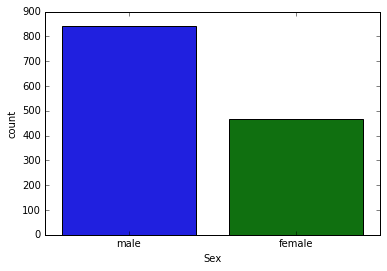

In [9]:
sns.countplot(x='Sex', data = full_df)
plt.show()

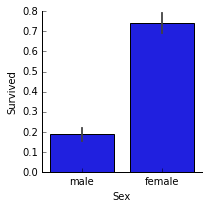

In [10]:
plot_categories(train_df , cat = 'Sex' , target = 'Survived', order = train_df.Sex.unique())
plt.show()

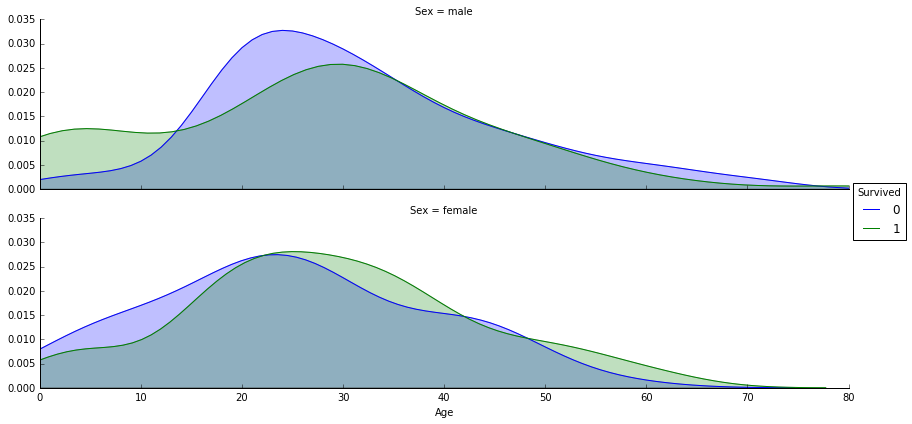

In [11]:
plot_distribution (train_df, var = 'Age' , target = 'Survived', row = 'Sex')
plt.show()

In [12]:
full_df.Sex.count()

1309

In [13]:
# replace sex string with a 0 or 1
gender_dict = {'female' : 1 , 'male' : 0}
full_df.Sex = full_df.Sex.map (gender_dict).astype(int)

## Embarked

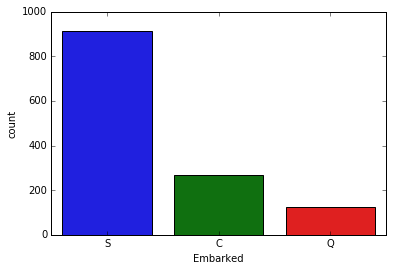

In [14]:
sns.countplot (x='Embarked', data=full_df)
plt.show()

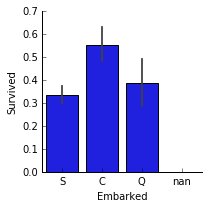

In [15]:
plot_categories(train_df , cat = 'Embarked' , target = 'Survived', order=train_df.Embarked.unique() )
plt.show()

In [16]:
full_df.Embarked.count()

1307

In [17]:
full_df.Embarked = full_df.Embarked.fillna('S')

In [18]:
# replace embarked label with a 1 or 2 or 3
embarked_dict = {'S' : 1 , 'C' : 2, 'Q' : 3}
full_df.Embarked = full_df.Embarked.map (embarked_dict).astype(int)

## Passenger Class

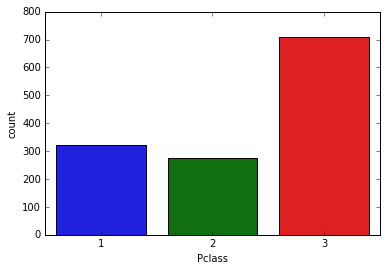

In [19]:
sns.countplot (x='Pclass', data=full_df)
plt.show()

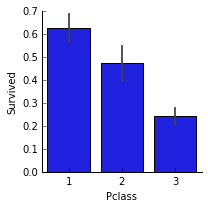

In [20]:
plot_categories( train_df , cat = 'Pclass' , target = 'Survived' )
plt.show()

In [21]:
full_df.Pclass.count()

1309

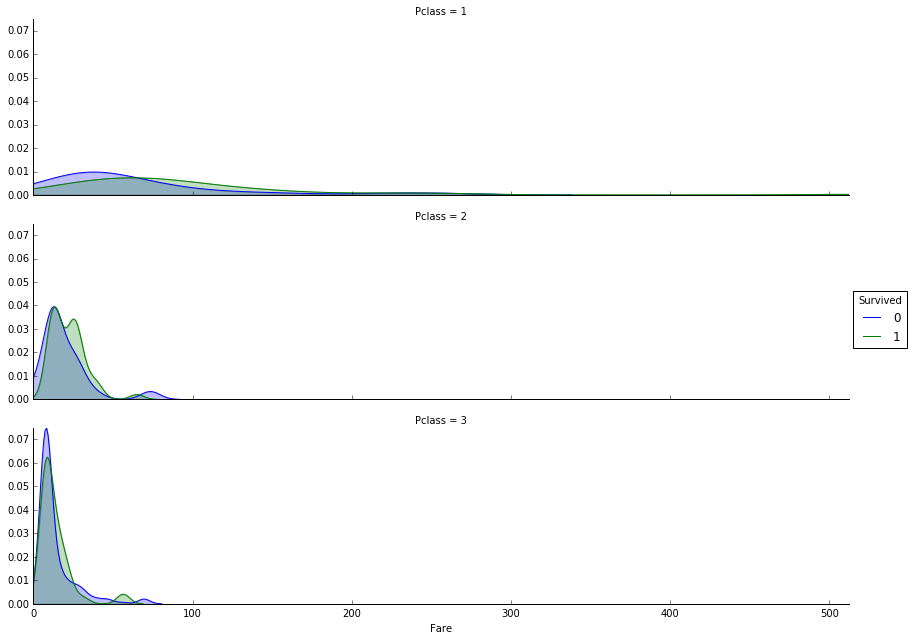

In [22]:
plot_distribution (train_df, var = 'Fare' , target = 'Survived' , row = 'Pclass' )
plt.show()

## Age

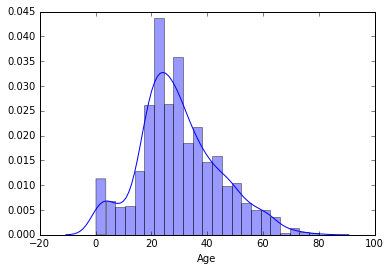

In [23]:
sns.distplot(full_df.Age.dropna(), hist=True)
plt.show()

In [24]:
full_df.Age.count()

1046

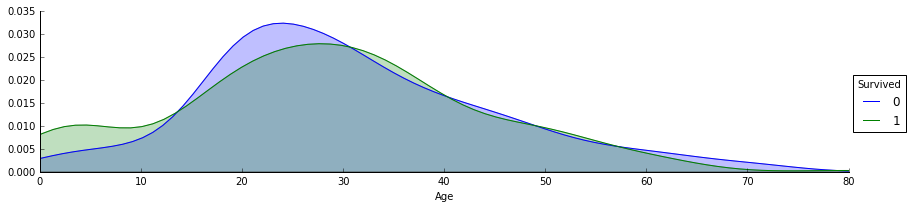

In [25]:
plot_distribution (train_df, var='Age', target='Survived')
plt.show()

In [26]:
print ('Mean age is %f' % full_df.Age.mean())
print ('Mode age is %f' % full_df.Age.mode()[0])
print ('Median age is %f' % full_df.Age.median())

Mean age is 29.881138
Mode age is 24.000000
Median age is 28.000000


In [27]:
full_df.Age = full_df.Age.fillna(train_df.Age.mean())

## Family

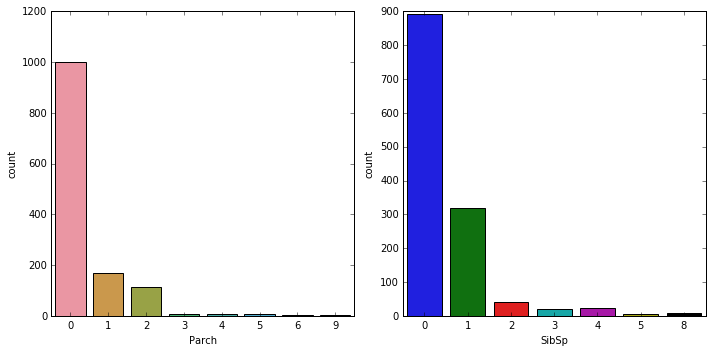

In [28]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

fig1 = sns.countplot(x='Parch', data = full_df, ax=axis1)
fig2 = sns.countplot(x='SibSp', data = full_df, ax=axis2)
plt.tight_layout()
plt.show()

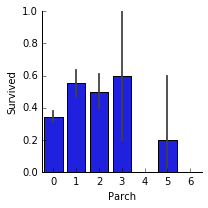

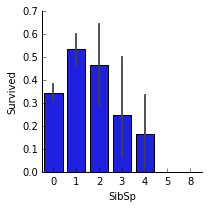

In [29]:
plot_categories(train_df , cat = 'Parch' , target = 'Survived')
plot_categories(train_df , cat = 'SibSp' , target = 'Survived')
plt.show()

In [30]:
print (full_df.Parch.count())
full_df.SibSp.count()

1309


1309

In [31]:
family = pd.DataFrame()

family['FamilySize'] = full_df.Parch + full_df.SibSp + 1

In [32]:
full_df['NotAlone'] = family.FamilySize.map (lambda fsize: 0 if fsize == 1 else 1).astype(int)

## Name

In [33]:
full_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

The format is `Last Name, Title. First Name`. We want to extract the title for each person.

In [34]:
# we extract the title from each name: split along ',' and take the second. Then split along '.' and take the first. 
# Then strip() to remove whitespace
full_df ['Title'] = full_df.Name.map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# print unique titles
full_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [35]:
full_df.Title.count()

1309

In [36]:
full_df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Title, dtype: int64

In [37]:
full_df.Title = full_df.Title.replace (['Capt', 'Col', 'Major', 'Jonkheer', 'Don', 'Sir', 'Dr', 
                                        'Rev', 'the Countess', 'Dona', 'Lady'], 'Rare')

full_df.Title = full_df.Title.replace ('Mme', 'Mrs')
full_df.Title = full_df.Title.replace ('Mlle', 'Ms')
full_df.Title = full_df.Title.replace ('Miss', 'Ms')

In [38]:
# replace titles with numbers
title_dict = {'Rare' : 1 , 'Mrs' : 2, 'Ms' : 3, 'Mr' : 4, 'Master': 5}
full_df.Title = full_df.Title.map (title_dict).astype(int)

## Fare

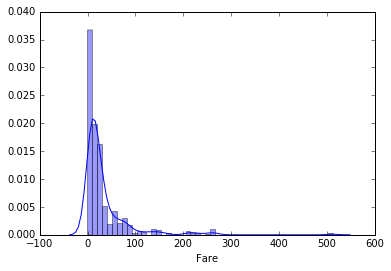

In [39]:
sns.distplot(full_df.Fare.dropna(), hist=True)
plt.show()

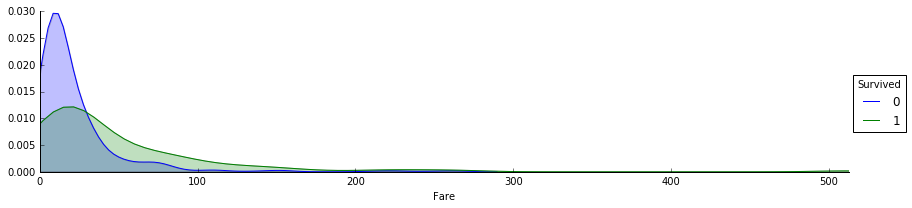

In [40]:
plot_distribution (train_df, var = 'Fare' , target = 'Survived')
plt.show()

In [41]:
full_df.Fare.count()

1308

In [42]:
print ('Mean fare is %f' % train_df.Fare.mean())
print ('Mode fare is %f' % train_df.Fare.mode()[0])
print ('Median fare is %f' % train_df.Fare.median())

Mean fare is 32.204208
Mode fare is 8.050000
Median fare is 14.454200


In [43]:
full_df.Fare = full_df.Fare.fillna(train_df.Fare.median())

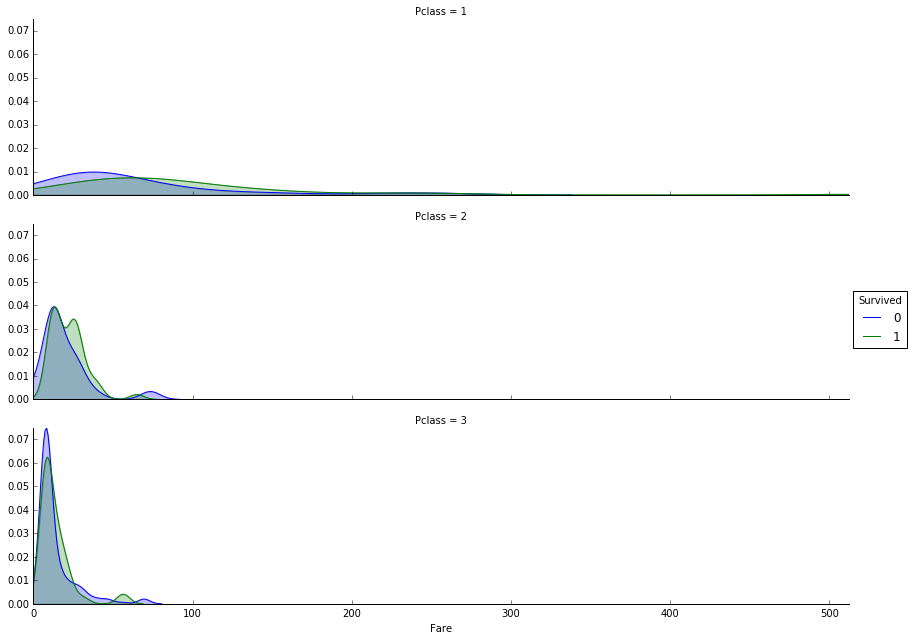

In [44]:
plot_distribution (train_df, var= 'Fare', target = 'Survived', row = 'Pclass')
plt.show()

# Dropping Elements

In [45]:
drop_elements = ['Cabin', 'Name', 'PassengerId', 'Ticket', 'Parch', 'SibSp']

engineered_df = full_df.drop (drop_elements, axis = 1)

In [46]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
Age         1309 non-null float64
Embarked    1309 non-null int64
Fare        1309 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int64
Survived    891 non-null float64
NotAlone    1309 non-null int64
Title       1309 non-null int64
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


### Dataset Object Distribution

Here we see that in the training set:

* Names are unique in the dataset
* Sex has 2 different variables with about **65%** of passengers being men
* Many of the issued tickets are duplicates with about **76%** unique
* Many of the cabins are booked more than once with **72%** of bookings being unique
* There were 3 ports embarkation with about **72%** of passengers coming from Southampton

### Analysis: Quick Correlations
<a id="analysis_qc"></a>

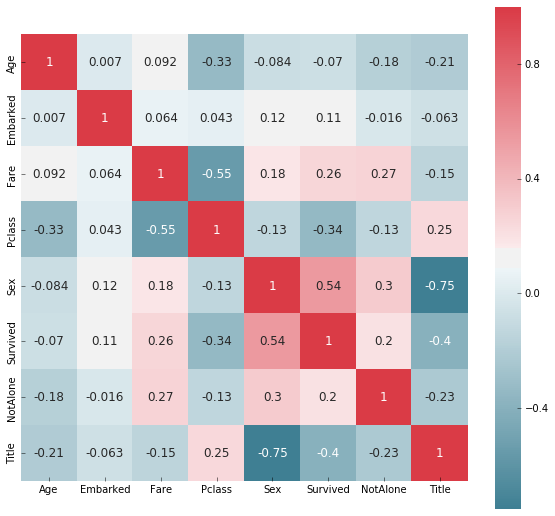

In [47]:
 def plot_correlation_map (df):
    corr = df.corr()
    fig = plt.subplots( figsize = ( 10 , 10 ) )
    cscheme = sns.diverging_palette( 220 , 10 , as_cmap = True )
    sns.heatmap(corr, cmap = cscheme, square=True, cbar_kws={ 'shrink' : .9 },
    annot = True, annot_kws = { 'fontsize' : 12 } )

plot_correlation_map (engineered_df[:890])
plt.show()

In [48]:
train_X = engineered_df.loc[0:890]

train_X = train_X.drop('Survived', axis=1)

train_y = train_df.Survived.loc[:]

valid_X = engineered_df.loc[891:]

valid_X = valid_X.drop('Survived', axis=1)

#train_valid_X['Survived'] = train.Survived.loc[:]

train_X.tail()

,Age,Embarked,Fare,Pclass,Sex,NotAlone,Title
886,27.000000,1,13.00,2,0,0,1
887,19.000000,1,30.00,1,1,0,3
888,29.699118,1,23.45,3,1,1,3
889,26.000000,2,30.00,1,0,0,4
890,32.000000,3,7.75,3,0,0,4


In [49]:
valid_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 7 columns):
Age         418 non-null float64
Embarked    418 non-null int64
Fare        418 non-null float64
Pclass      418 non-null int64
Sex         418 non-null int64
NotAlone    418 non-null int64
Title       418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [50]:
#train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

0.984287317621


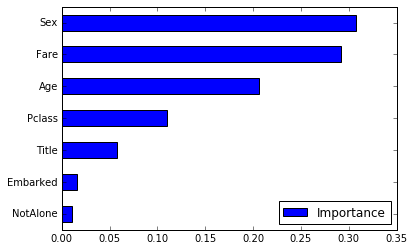

In [51]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_variable_importance(train_X, train_y)
plt.show()

#### Logistic Regression

In [52]:
model = LogisticRegression()
model.fit( train_X , train_y )
model.score( train_X , train_y )

0.79461279461279466

#### Random Forest

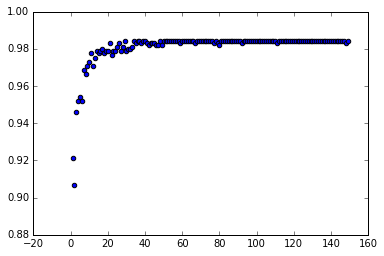

In [53]:
#model = RandomForestClassifier (n_estimators=100)
#model.fit( train_X , train_y )
#print (model.score( train_X , train_y ))# , model.score( valid_X , valid_y ))

RF_results = pd.DataFrame(columns=['estimates','score'], index=range(0,149))

for estimates in range (1,150):
    model = RandomForestClassifier (n_estimators=estimates)
    model.fit( train_X , train_y )
    RF_results.loc[estimates-1, 'estimates'] = estimates
    RF_results.loc[estimates-1, 'score'] = model.score( train_X , train_y )
    
plt.scatter(RF_results.estimates, RF_results.score)
plt.show()

#### Support Vector Machines

In [54]:
model = SVC()
model.fit( train_X , train_y )
model.score( train_X , train_y ) 

0.90460157126823793

#### Gradient Boosting Classifier

In [55]:
model = GradientBoostingClassifier()
model.fit( train_X , train_y )
model.score( train_X , train_y )

0.89337822671156009

#### K-nearest Neighbors

In [56]:
KNN_results = pd.DataFrame(columns=['dots','score'], index=range(0,10))

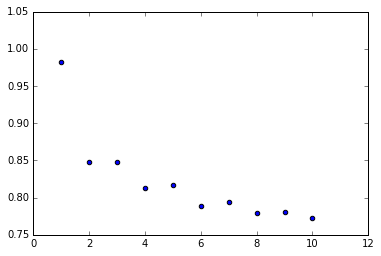

In [57]:
for dots in range (1,11):
    model = KNeighborsClassifier(n_neighbors=dots)
    model.fit( train_X , train_y )
    KNN_results.loc[dots-1, 'dots'] = dots
    KNN_results.loc[dots-1, 'score'] = model.score( train_X , train_y )
    
plt.scatter(KNN_results.dots, KNN_results.score)
plt.show()

#### Gaussian Naive Bayes

In [58]:
model = GaussianNB()
model.fit( train_X , train_y )
model.score( train_X , train_y )

0.77328843995510665

## Complete the Dataset

In [59]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
NotAlone       1309 non-null int64
Title          1309 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 143.2+ KB


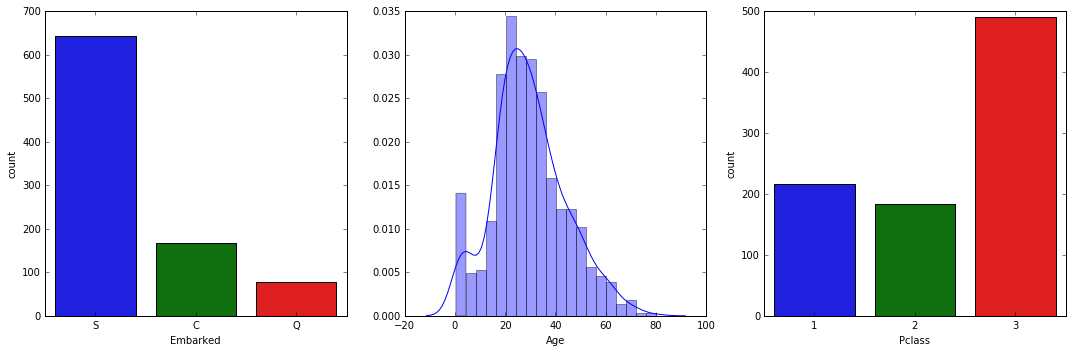

In [60]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

fig1 = sns.countplot(x='Embarked', data = train_df, ax=axis1)
fig2 = sns.distplot(train_df.Age.dropna(), ax=axis2, hist=True)
fig3 = sns.countplot(x='Pclass', data=train_df, ax=axis3)
#fig2.set_xticks(np.arange(5,85,5))
#fig2.set_xticklabels(np.arange(5,85,5))
plt.tight_layout()
plt.show()

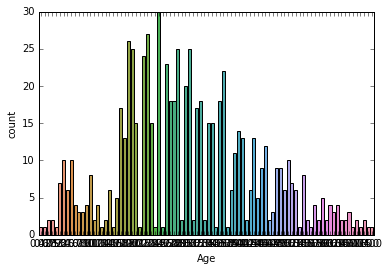

In [61]:
sns.countplot(x='Age', data=train_df)
plt.show()

In [62]:
full_df.Age.mode()

0    29.699118
dtype: float64

In [63]:
np.arange(1,5,2)

array([1, 3])

In [64]:
full_df.Age.describe()

count    1309.000000
mean       29.844567
std        12.883400
min         0.170000
25%        22.000000
50%        29.699118
75%        35.000000
max        80.000000
Name: Age, dtype: float64

## Feature Engineering

In this section, we create the features from the dataset that will be used to train our model. The idea will be to discard superfluous information and map relevant categorical variables to numbers where applicable. In particular, we choose to:

* convert sex to a binary number, 0 for female 1 for male
* d

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
full_df = train_df.append(test_df, ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:

# we map each title
title_df [ 'Title' ] = title_df.Title.map( title_dict )

title_df = pd.get_dummies( title_df.Title )

#full_df.title = full_df.title



NameError: name 'title_df' is not defined

### OLD

Now that we have understand what is in our dataset, we can look at a few quick correlations between different variables to see if we can spot any preliminary patterns. From the description given [above](#top) and the variables in our dataset, we expect to see correlations between `Survival` and `Sex`, `Age`, `Pclass`, and `Fare`.

In [ ]:
train[['Sex', 'Survived']].groupby(by=['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
train[['Pclass', 'Survived']].groupby(by=['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

And this is exactly what we find. Survival with is associated with being female and being in the higher ship classes. Looking additionally at the Siblings/Spouses and Parents/Children variables, we observe:

In [ ]:
train[['SibSp', 'Survived']].groupby(by=['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
train[['Parch', 'Survived']].groupby(by=['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

There may be a slight positive correlation between `Survival` and `Parch` (for family sizes $<4$) but we have very little data for anything with `Parch >= 3`.

In [ ]:
train[['Fare', 'Survived']].groupby(by=train['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
#colormap = plt.cm.viridis
#plt.figure(figsize=(12,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

Below we are plotting the mean fare for a given passenger of some sex that departed from a given port. From this, we see that the correlation between more males survivng than females 

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.7, ci=None)
grid.add_legend()
plt.show()

The function `pd.crosstab` gives us back frequencies for the given values, i.e., the table below is telling us that 136 people in `Pclass 1` survived while 80 did not. 

In [ ]:
pd.crosstab(train['Survived'], train['Pclass'], margins=True)

We can convert this to percentages in the following two ways:

In [ ]:
pd.crosstab(train['Survived'], train['Pclass']).apply(lambda x: x/x.sum(), axis = 1)

In [ ]:
pd.crosstab(train['Survived'], train['Pclass']).apply(lambda x: x/x.sum(), axis = 0)

Note that we done this in two different ways. Setting `axis = 1` means to do the sum across rows while `axis = 0` means to sum across columns. So the first table tells us that of those who died, only **14%** came from first class. The second table then tells us that of those in first class, **63%** of them survived. Of course, these statistics might come from small data sets so the first table showing frequencies is quite useful.

### Dropping data

Now let's go about dropping inconsequential data from our dataset.

In [ ]:
print("Before", train.shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)

print ("After", train.shape)


# Appendix
<a id="appendix"></a>

## Types of Variables
<a id="app_vartypes"></a>

### Categorical Variables
<a id="app_categorical"></a>

Categorical variables are *qualitative* and take on only a limited number of values. There are 3 types, nominal, ordinal, and interval:

* A **nominal variable** (sometimes called a **categorical variable**) is one that has two or more categories, but there is no intrinsic ordering to the categories, e.g., gender, hair color
<br><br>
* An **ordinal variable** is a type of categorical variable but one for which a clear ordering exists, e.g., education level (elementary, high school, college, graduate)
<br><br>
* An **interval variable** is similar to an ordinal variable but is defined on intervals that are equally spaced, e.g., whether someone is in the \$20,000-\$30,000, \$30,000-\$40,000, or \$40,000-\$50,000 income bracket

### Numerical Variables
<a id="app_numerical"></a>

Numerical variables are *quantitative* and have numbers as their values. There are 2 types, continuous and discrete:

* A **continuous variable** can take on any value in some range, e.g., the height of a person
<br><br>
* A **discrete variable** can only take on a specific number, e.g., how many siblings does a person have

## Resources
<a id='resources'></a>

[Megan Risdal's Notebook in R](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic)

[Helge Bjorland's Notebook](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)

[Manav Sehgal's Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

[Omar El Gabry's Notebook](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)

[Arthur Tok's Notebook](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

[Sina's Notebook](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)

[Sushant implementation](http://nbviewer.jupyter.org/github/sushant2811/KaggleTitanic/blob/master/KaggleTitanicSushant.ipynb)

[IBM Markdown Cheatsheet](http://datascience.ibm.com/blog/markdown-for-jupyter-notebooks-cheatsheet/)

[Another Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)

[Discussion on categorical variables](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)